In [44]:
import pandas as pd
import mplfinance as mpf
import numpy as np
from io import StringIO


In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

def vertical_lines_on_bear_candles(df, flag_col='isBear'):
    """
    Plot candlestick chart with full-plot-height vertical lines
    on candles where df[flag_col] == 1.

    Parameters:
        df : DataFrame
            OHLC data with index as DateTime and columns Open, High, Low, Close.
        flag_col : str
            Name of the column used to identify candles to mark (1 = mark, 0 = skip).
    """
    fig, axlist = mpf.plot(df, type='candle', style='classic', returnfig=True,
                           title=f"Vertical Lines on Candles flagged by '{flag_col}'")
    ax = axlist[0]  # Main axes
    ylim = ax.get_ylim()  # Full plot height

    for i, flag in enumerate(df[flag_col]):
        if flag == 1:
            ax.vlines(i, ylim[0], ylim[1], color='red', linewidth=2)

    plt.show()


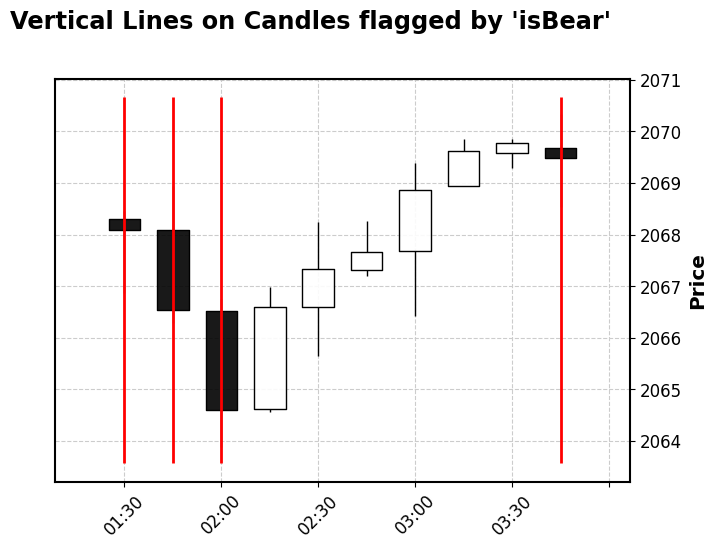

In [46]:
# Sample data
data_str = """Date,Time,Open,High,Low,Close,Col7,Col8,Col9
2024.01.02,01:30:00,2068.308,2068.462,2066.869,2068.094,15,0,369
2024.01.02,01:45:00,2068.081,2068.951,2066.290,2066.536,15,0,369
2024.01.02,02:00:00,2066.512,2066.749,2063.891,2064.607,15,0,368
2024.01.02,02:15:00,2064.619,2066.983,2064.560,2066.596,15,0,369
2024.01.02,02:30:00,2066.597,2068.247,2065.657,2067.342,15,0,369
2024.01.02,02:45:00,2067.307,2068.267,2067.207,2067.669,15,0,367
2024.01.02,03:00:00,2067.693,2069.394,2066.422,2068.867,15,0,368
2024.01.02,03:15:00,2068.934,2069.863,2068.934,2069.631,15,0,368
2024.01.02,03:30:00,2069.589,2069.854,2069.295,2069.767,15,0,369
2024.01.02,03:45:00,2069.688,2070.338,2068.541,2069.487,15,0,368"""

# Load data
df = pd.read_csv(StringIO(data_str), sep=",")
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)
df = df[['Open','High','Low','Close']]

df['isBear'] = (df['Close'] < df['Open']).astype(int)



# Function 1: Plot classic candlestick chart
def plot_candles(df, title="Candlestick Chart"):
    mpf.plot(df, type='candle', style='classic', title=title)

# print(df.head())

vertical_lines_on_bear_candles(df)